<a href='https://colab.research.google.com/github/ishaqmarashy/red-light-traffic-violation-classification/blob/main/decision%20tree%20classifier.ipynb' target='_parent'><img src='https://colab.research.google.com/assets/colab-badge.svg' alt='Open In Colab'/></a>

## Preprocess Data

In [428]:
import pandas as pd
import os
import numpy as np

csv_filename1 = "data/tv_asos.csv"
df = pd.read_csv(csv_filename1)

In [429]:
df.drop(columns=['Accident','Violation Type','Charge','Article','Contributed To Accident','Article','HAZMAT','Personal Injury','Fatal'],inplace=True)


In [430]:
df

,Latitude,Longitude,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,...,DV,DATE,tmpf,dwpf,sknt,relh,alti,vsby,feel,skyc1
0,38.997645,-77.027105,No,No,No,No,No,No,MD,02 - Automobile,...,0,2023-04-30 03:00:00,57.919565,55.435556,3.970000,91.751778,29.741089,9.480000,57.897778,CLR
1,38.997566,-77.109724,No,No,No,No,No,No,MD,02 - Automobile,...,1,2023-05-02 12:00:00,46.962791,38.032558,7.695238,72.453721,29.453962,9.416667,44.610233,BKN
2,39.223205,-77.260313,No,Yes,No,No,No,No,MD,02 - Automobile,...,0,2023-05-16 10:00:00,55.866667,52.961905,3.707547,90.415238,29.960654,9.923077,55.869048,CLR
3,39.057987,-76.968677,No,No,No,No,No,No,MD,02 - Automobile,...,1,2023-05-17 14:00:00,64.221951,49.446341,8.872549,59.397317,29.769541,10.000000,64.229268,CLR
4,38.999282,-77.026098,No,Yes,No,No,No,No,MD,02 - Automobile,...,0,2023-05-20 10:00:00,57.889474,56.616667,2.958678,95.791481,30.064426,4.885798,57.838889,OVC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,0.000000,0.000000,No,No,No,No,No,No,MD,02 - Automobile,...,0,2013-09-17 02:00:00,58.643810,53.248095,1.634146,83.465952,30.222143,9.575000,58.635714,SCT
1782,0.000000,0.000000,No,No,No,No,No,No,MD,02 - Automobile,...,0,2013-09-25 02:00:00,53.233333,49.070000,0.512195,86.456190,29.981429,9.926829,53.203571,CLR
1783,0.000000,0.000000,No,No,No,No,No,No,MD,02 - Automobile,...,0,2013-09-19 02:00:00,55.603182,49.180455,1.697674,79.646364,30.228409,10.000000,55.557955,CLR
1784,39.144320,-77.067415,No,No,No,No,No,No,MD,02 - Automobile,...,0,2014-12-17 23:00:00,41.876923,28.556757,7.972973,57.388378,30.011538,9.921053,38.103714,CLR


https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html

https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.html

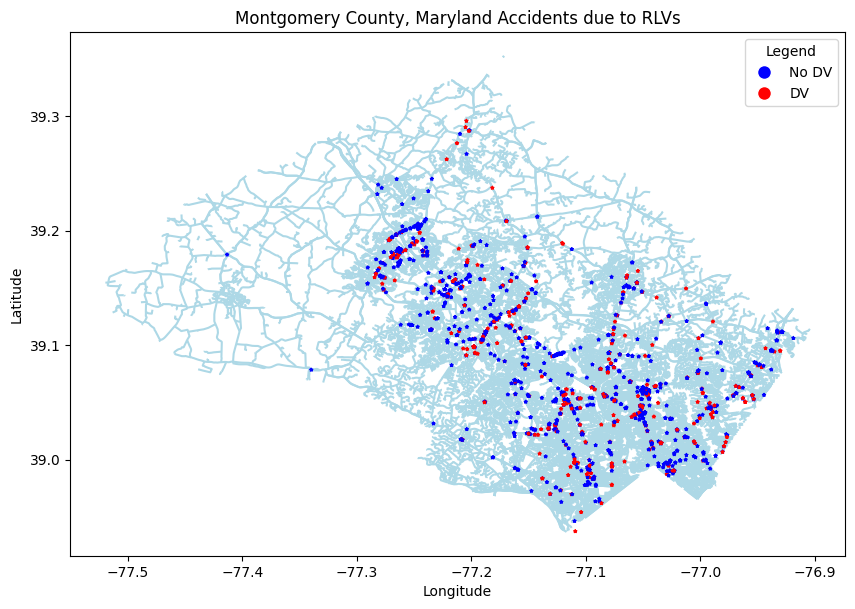

In [431]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

filtered_df = df[(df['Latitude'] != 0) & (df['Longitude'] != 0) & (df['Longitude'] <= -76.9)& (df['Latitude'] >=38.93)]
montgomery_shapefile_path = './data/roads/tl_2019_24031_roads.shp'
montgomery_gdf = gpd.read_file(montgomery_shapefile_path)

geometry = [Point(xy) for xy in zip(filtered_df['Longitude'], filtered_df['Latitude'])]
geo_points = gpd.GeoDataFrame(filtered_df, geometry=geometry)

fig, ax = plt.subplots(figsize=(10, 10))

montgomery_gdf.plot(ax=ax, color='lightblue', edgecolor='black', zorder=1)
geo_points.plot(ax=ax, marker='*', color=filtered_df['DV'].map({0: 'blue', 1: 'red'}), markersize=5, zorder=2)

legend_labels = {0: 'No DV', 1: 'DV'}
ax.legend([plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10)],
          [legend_labels[0], legend_labels[1]], title='Legend', loc='upper right')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.title('Montgomery County, Maryland Accidents due to RLVs')
plt.show()


In [432]:
df.drop(columns=['Latitude', 'Longitude'],inplace=True)

In [433]:
df.isna().sum()

Belts                 0
Property Damage       0
Commercial License    0
Commercial Vehicle    0
Alcohol               0
Work Zone             0
State                 0
VehicleType           0
Year                  1
Make                  0
Model                 0
Color                 5
Race                  0
Gender                0
Driver City           0
Driver State          0
DL State              1
DV                    0
DATE                  0
tmpf                  0
dwpf                  0
sknt                  0
relh                  0
alti                  0
vsby                  0
feel                  0
skyc1                 0
dtype: int64

In [434]:
import pandas as pd
from sklearn.impute import SimpleImputer


data_for_imputation = df.copy()

categorical_imputer = SimpleImputer(strategy='most_frequent')

imputed_values = categorical_imputer.fit_transform(data_for_imputation)

imputed_df = pd.DataFrame(imputed_values,columns=df.columns)

df= imputed_df

df


,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Year,Make,...,DV,DATE,tmpf,dwpf,sknt,relh,alti,vsby,feel,skyc1
0,No,No,No,No,No,No,MD,02 - Automobile,2020.0,LINC,...,0,2023-04-30 03:00:00,57.919565,55.435556,3.97,91.751778,29.741089,9.48,57.897778,CLR
1,No,No,No,No,No,No,MD,02 - Automobile,2023.0,MAZDA,...,1,2023-05-02 12:00:00,46.962791,38.032558,7.695238,72.453721,29.453962,9.416667,44.610233,BKN
2,No,Yes,No,No,No,No,MD,02 - Automobile,2023.0,VOLK,...,0,2023-05-16 10:00:00,55.866667,52.961905,3.707547,90.415238,29.960654,9.923077,55.869048,CLR
3,No,No,No,No,No,No,MD,02 - Automobile,2012.0,HONDA,...,1,2023-05-17 14:00:00,64.221951,49.446341,8.872549,59.397317,29.769541,10.0,64.229268,CLR
4,No,Yes,No,No,No,No,MD,02 - Automobile,2018.0,HOND,...,0,2023-05-20 10:00:00,57.889474,56.616667,2.958678,95.791481,30.064426,4.885798,57.838889,OVC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,No,No,No,No,No,No,MD,02 - Automobile,2005.0,HOND,...,0,2013-09-17 02:00:00,58.64381,53.248095,1.634146,83.465952,30.222143,9.575,58.635714,SCT
1782,No,No,No,No,No,No,MD,02 - Automobile,1997.0,MITS,...,0,2013-09-25 02:00:00,53.233333,49.07,0.512195,86.45619,29.981429,9.926829,53.203571,CLR
1783,No,No,No,No,No,No,MD,02 - Automobile,2005.0,HOND,...,0,2013-09-19 02:00:00,55.603182,49.180455,1.697674,79.646364,30.228409,10.0,55.557955,CLR
1784,No,No,No,No,No,No,MD,02 - Automobile,1996.0,ISUZU,...,0,2014-12-17 23:00:00,41.876923,28.556757,7.972973,57.388378,30.011538,9.921053,38.103714,CLR


In [435]:
df['VehicleType'].value_counts()

VehicleType
02 - Automobile              1580
05 - Light Duty Truck          90
28 - Other                     40
03 - Station Wagon             31
01 - Motorcycle                18
06 - Heavy Duty Truck          15
10 - Transit Bus                6
07 - Truck/Road Tractor         3
08 - Recreational Vehicle       1
20 - Commercial Rig             1
29 - Unknown                    1
Name: count, dtype: int64

In [436]:
def classify_vehicle(vehicle_type):
    if any(category in vehicle_type for category in ['01 - Motorcycle']):
        return 'Light'
    elif any(category in vehicle_type for category in ['28 - Other','29 - Unknown', '03 - Station Wagon', '02 - Automobile']):
        return 'Medium'
    elif any(category in vehicle_type for category in ['05 - Light Duty Truck', '07 - Truck/Road Tractor', '08 - Recreational Vehicle',]):
        return 'Heavy'
    else:
        return 'Very Heavy'
    
df['VehicleType'] = df['VehicleType'].apply(classify_vehicle)

In [437]:
df['Year']=df['Year'].astype(int)
df['Vehicle'] = df[[ 'Year', 'Make', 'Model']].astype(str).apply(lambda x: ', '.join(x), axis=1)

In [438]:
df['Vehicle'].value_counts()

Vehicle
2014, HONDA, ACCORD         9
2004, HONDA, ACCORD         9
2006, CHEV, MALIBU          7
2010, TOYOTA, COROLLA       6
2014, TOYOTA, CAMRY         6
                           ..
2002, VOLVO, S60            1
2012, NISSAN, SENTRA 4DR    1
2009, SCION, TC             1
2003, MERCEDES, E320        1
1996, ISUZU, RODEO          1
Name: count, Length: 1384, dtype: int64

In [439]:
df.drop(columns=['Year', 'Make', 'Model'],inplace=True)
df.columns

Index(['Belts', 'Property Damage', 'Commercial License', 'Commercial Vehicle',
       'Alcohol', 'Work Zone', 'State', 'VehicleType', 'Color', 'Race',
       'Gender', 'Driver City', 'Driver State', 'DL State', 'DV', 'DATE',
       'tmpf', 'dwpf', 'sknt', 'relh', 'alti', 'vsby', 'feel', 'skyc1',
       'Vehicle'],
      dtype='object')

In [440]:
df

,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Color,Race,...,DATE,tmpf,dwpf,sknt,relh,alti,vsby,feel,skyc1,Vehicle
0,No,No,No,No,No,No,MD,Medium,WHITE,BLACK,...,2023-04-30 03:00:00,57.919565,55.435556,3.97,91.751778,29.741089,9.48,57.897778,CLR,"2020, LINC, UT"
1,No,No,No,No,No,No,MD,Medium,"BLUE, LIGHT",HISPANIC,...,2023-05-02 12:00:00,46.962791,38.032558,7.695238,72.453721,29.453962,9.416667,44.610233,BKN,"2023, MAZDA, CX-5"
2,No,Yes,No,No,No,No,MD,Medium,WHITE,BLACK,...,2023-05-16 10:00:00,55.866667,52.961905,3.707547,90.415238,29.960654,9.923077,55.869048,CLR,"2023, VOLK, ATLAS"
3,No,No,No,No,No,No,MD,Medium,GRAY,WHITE,...,2023-05-17 14:00:00,64.221951,49.446341,8.872549,59.397317,29.769541,10.0,64.229268,CLR,"2012, HONDA, ODYSSEY"
4,No,Yes,No,No,No,No,MD,Medium,BLACK,HISPANIC,...,2023-05-20 10:00:00,57.889474,56.616667,2.958678,95.791481,30.064426,4.885798,57.838889,OVC,"2018, HOND, SW"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,No,No,No,No,No,No,MD,Medium,GREEN,ASIAN,...,2013-09-17 02:00:00,58.64381,53.248095,1.634146,83.465952,30.222143,9.575,58.635714,SCT,"2005, HOND, 4S"
1782,No,No,No,No,No,No,MD,Medium,BLACK,WHITE,...,2013-09-25 02:00:00,53.233333,49.07,0.512195,86.45619,29.981429,9.926829,53.203571,CLR,"1997, MITS, 4S"
1783,No,No,No,No,No,No,MD,Medium,BLACK,WHITE,...,2013-09-19 02:00:00,55.603182,49.180455,1.697674,79.646364,30.228409,10.0,55.557955,CLR,"2005, HOND, 4S"
1784,No,No,No,No,No,No,MD,Medium,WHITE,WHITE,...,2014-12-17 23:00:00,41.876923,28.556757,7.972973,57.388378,30.011538,9.921053,38.103714,CLR,"1996, ISUZU, RODEO"


In [441]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['Time'] = df['DATE'].dt.time
df['DATE'] = df['DATE'].dt.date

In [442]:
def sine_of_time(time):
    return np.sin(2 * np.pi * (time.hour * 3600 + time.minute * 60 + time.second) / (24 * 3600))

df['SinOfTime'] = df['Time'].apply(sine_of_time)

print(df[['Time', 'SinOfTime']])

          Time     SinOfTime
0     03:00:00  7.071068e-01
1     12:00:00 -3.216245e-16
2     10:00:00  5.000000e-01
3     14:00:00 -5.000000e-01
4     10:00:00  5.000000e-01
...        ...           ...
1781  02:00:00  5.000000e-01
1782  02:00:00  5.000000e-01
1783  02:00:00  5.000000e-01
1784  23:00:00 -2.588190e-01
1785  23:00:00 -2.588190e-01

[1786 rows x 2 columns]


In [443]:
def categorize_time(time):
    if 5 < time.hour <= 9:
        return 'am-peak'
    elif 12 < time.hour <= 14:
        return 'mid-peak'
    elif 16 < time.hour <= 20:
        return 'pm-peak'
    else:
        return 'non-peak'
    
df['TimeCategory'] = df['Time'].apply(categorize_time)

In [444]:
df['TimeCategory']

0       non-peak
1       non-peak
2       non-peak
3       mid-peak
4       non-peak
          ...   
1781    non-peak
1782    non-peak
1783    non-peak
1784    non-peak
1785    non-peak
Name: TimeCategory, Length: 1786, dtype: object

In [445]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

columns_to_encode =  ['State', 'VehicleType','Color', 'Race', 'Driver City',
                       'Driver State', 'DL State', 'skyc1', 'Vehicle',
                         'Belts', 'Property Damage', 'Commercial License', 
                         'Commercial Vehicle', 'Alcohol', 'Gender','Work Zone','TimeCategory']

for column in columns_to_encode:
    df[column] =label_encoder.fit_transform(df[column])
df

,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Color,Race,...,sknt,relh,alti,vsby,feel,skyc1,Vehicle,Time,SinOfTime,TimeCategory
0,0,0,0,0,0,0,12,2,19,1,...,3.97,91.751778,29.741089,9.48,57.897778,2,1362,03:00:00,7.071068e-01,2
1,0,0,0,0,0,0,12,2,4,2,...,7.695238,72.453721,29.453962,9.416667,44.610233,1,1382,12:00:00,-3.216245e-16,2
2,0,1,0,0,0,0,12,2,19,1,...,3.707547,90.415238,29.960654,9.923077,55.869048,2,1383,10:00:00,5.000000e-01,2
3,0,0,0,0,0,0,12,2,8,5,...,8.872549,59.397317,29.769541,10.0,64.229268,2,946,14:00:00,-5.000000e-01,1
4,0,1,0,0,0,0,12,2,1,2,...,2.958678,95.791481,30.064426,4.885798,57.838889,4,1300,10:00:00,5.000000e-01,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,0,0,0,0,0,0,12,2,9,0,...,1.634146,83.465952,30.222143,9.575,58.635714,5,454,02:00:00,5.000000e-01,2
1782,0,0,0,0,0,0,12,2,1,5,...,0.512195,86.45619,29.981429,9.926829,53.203571,2,86,02:00:00,5.000000e-01,2
1783,0,0,0,0,0,0,12,2,1,5,...,1.697674,79.646364,30.228409,10.0,55.557955,2,454,02:00:00,5.000000e-01,2
1784,0,0,0,0,0,0,12,2,19,5,...,7.972973,57.388378,30.011538,9.921053,38.103714,2,58,23:00:00,-2.588190e-01,2


In [446]:
x=df.drop(columns=['DV'])
y=df['DV']
x['DATE'] = pd.to_datetime(x['DATE']).astype('int64') // 10**9  
x['Time'] = x['Time'].apply(lambda time: (time.hour * 60*60 + time.minute * 60 + time.second) if pd.notnull(time) else pd.NaT)
x['tmpf'] = pd.to_numeric(x['tmpf'], errors='coerce')
x['dwpf'] = pd.to_numeric(x['dwpf'], errors='coerce')
x['sknt'] = pd.to_numeric(x['sknt'], errors='coerce')
x['relh'] = pd.to_numeric(x['relh'], errors='coerce')
x['alti'] = pd.to_numeric(x['alti'], errors='coerce')
x['vsby'] = pd.to_numeric(x['vsby'], errors='coerce')
x['feel'] = pd.to_numeric(x['feel'], errors='coerce')

y = pd.to_numeric(y, errors='coerce')

In [447]:
x

,Belts,Property Damage,Commercial License,Commercial Vehicle,Alcohol,Work Zone,State,VehicleType,Color,Race,...,sknt,relh,alti,vsby,feel,skyc1,Vehicle,Time,SinOfTime,TimeCategory
0,0,0,0,0,0,0,12,2,19,1,...,3.970000,91.751778,29.741089,9.480000,57.897778,2,1362,10800,7.071068e-01,2
1,0,0,0,0,0,0,12,2,4,2,...,7.695238,72.453721,29.453962,9.416667,44.610233,1,1382,43200,-3.216245e-16,2
2,0,1,0,0,0,0,12,2,19,1,...,3.707547,90.415238,29.960654,9.923077,55.869048,2,1383,36000,5.000000e-01,2
3,0,0,0,0,0,0,12,2,8,5,...,8.872549,59.397317,29.769541,10.000000,64.229268,2,946,50400,-5.000000e-01,1
4,0,1,0,0,0,0,12,2,1,2,...,2.958678,95.791481,30.064426,4.885798,57.838889,4,1300,36000,5.000000e-01,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,0,0,0,0,0,0,12,2,9,0,...,1.634146,83.465952,30.222143,9.575000,58.635714,5,454,7200,5.000000e-01,2
1782,0,0,0,0,0,0,12,2,1,5,...,0.512195,86.456190,29.981429,9.926829,53.203571,2,86,7200,5.000000e-01,2
1783,0,0,0,0,0,0,12,2,1,5,...,1.697674,79.646364,30.228409,10.000000,55.557955,2,454,7200,5.000000e-01,2
1784,0,0,0,0,0,0,12,2,19,5,...,7.972973,57.388378,30.011538,9.921053,38.103714,2,58,82800,-2.588190e-01,2


In [448]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.3,
                                                    random_state=42, stratify=y)

## SMOTE

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [449]:
y.value_counts()

DV
0    1227
1     559
Name: count, dtype: int64

In [450]:
print(x.dtypes) 
print(y.dtypes)  

Belts                   int32
Property Damage         int32
Commercial License      int32
Commercial Vehicle      int32
Alcohol                 int32
Work Zone               int32
State                   int32
VehicleType             int32
Color                   int32
Race                    int32
Gender                  int32
Driver City             int32
Driver State            int32
DL State                int32
DATE                    int64
tmpf                  float64
dwpf                  float64
sknt                  float64
relh                  float64
alti                  float64
vsby                  float64
feel                  float64
skyc1                   int32
Vehicle                 int32
Time                    int64
SinOfTime             float64
TimeCategory            int32
dtype: object
int64


In [451]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X_OS, y_OS = oversample.fit_resample(X_train, y_train)

In [452]:
y_OS.value_counts()

DV
0    859
1    859
Name: count, dtype: int64

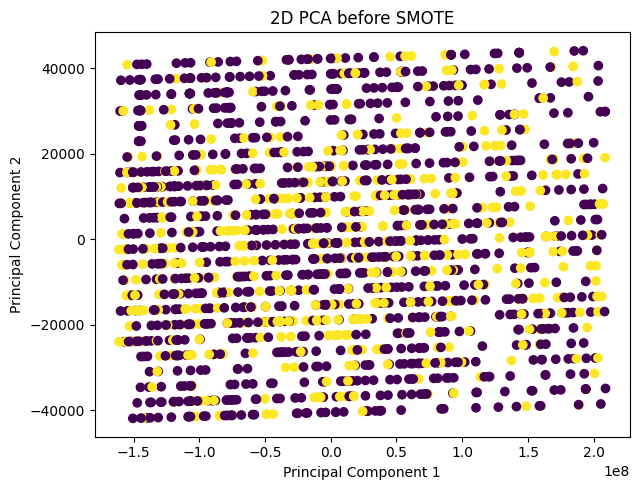

In [453]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['Label'] = y

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('2D PCA before SMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


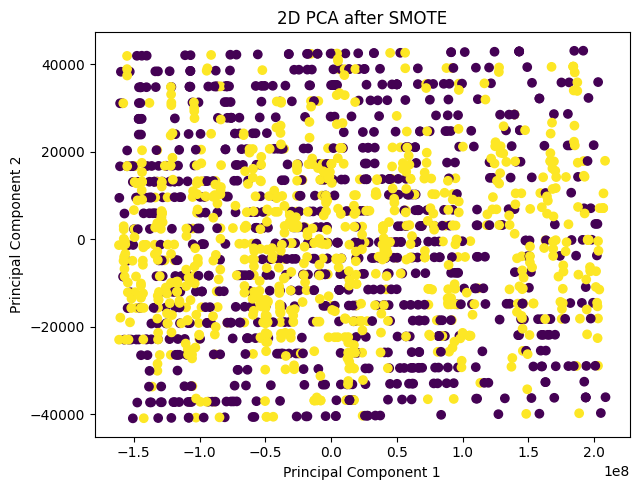

In [454]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_OS)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['Label'] = y_OS

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_OS, cmap='viridis')
plt.title('2D PCA after SMOTE')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()


## Ensamble


### Bayesian Neural Network

https://towardsdatascience.com/from-theory-to-practice-with-bayesian-neural-network-using-python-9262b611b825

https://github.com/Harry24k/bayesian-neural-network-pytorch/blob/master/demos/Bayesian%20Neural%20Network%20Classification.ipynb

In [455]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchbnn as bnn
import matplotlib.pyplot as plt

seed = 42
torch.manual_seed(seed)
np.random.seed(seed)


In [456]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler for normalization
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_OS.values)
X_test_normalized = scaler.transform(X_test.values)

# Convert normalized data to PyTorch tensors
x_train_tensor = torch.FloatTensor(X_train_normalized)
y_train_tensor = torch.FloatTensor(y_OS.values)
x_test_tensor = torch.FloatTensor(X_test_normalized)
y_test_tensor = torch.FloatTensor(y_test.values)


In [457]:
# Define Model
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=27, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=2),
)

In [458]:
ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [459]:
for step in range(3000):
    pre = model(x_train_tensor)
    y_train_tensor1 = y_train_tensor.to(torch.long)
    y_train_tensor1 = y_train_tensor1.view(-1) 
    ce = ce_loss(pre, y_train_tensor1)
    kl = kl_loss(model)
    cost = ce + kl_weight * kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

In [460]:
_, predicted = torch.max(pre.data, 1)
total = y_train_tensor1.size(0) 

In [461]:
from sklearn.metrics import classification_report

report=classification_report(y_train_tensor1,predicted)   
print("Train set Classification Report:\n", report)

Train set Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       859
           1       0.90      0.83      0.87       859

    accuracy                           0.87      1718
   macro avg       0.87      0.87      0.87      1718
weighted avg       0.87      0.87      0.87      1718



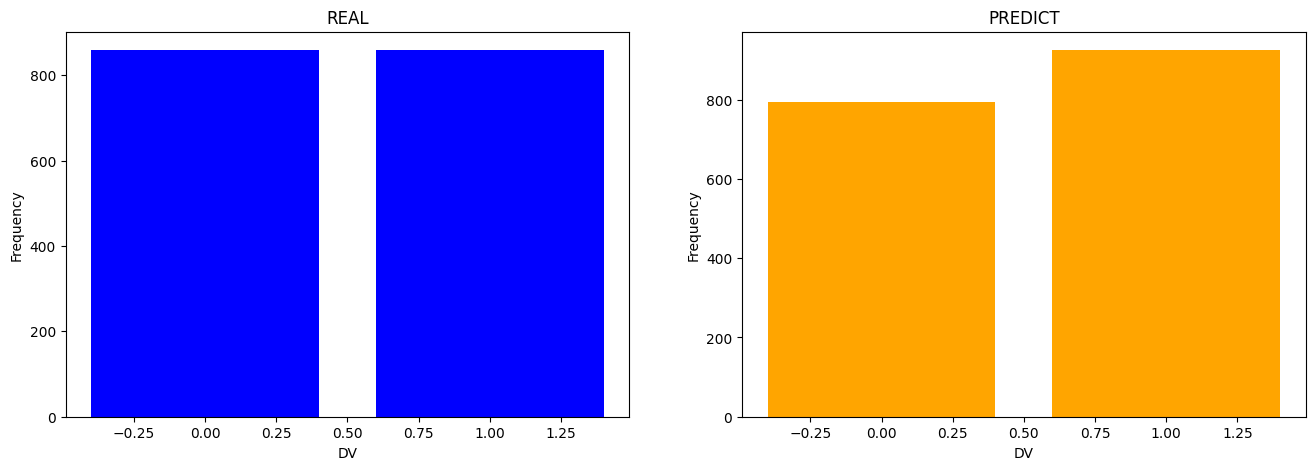

In [462]:
def draw_plot(predicted, Y):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

    real_counts = np.bincount(Y)
    ax1.bar(range(len(real_counts)), real_counts, color='blue')
    ax1.set_title("REAL")
    ax1.set_xlabel("DV")
    ax1.set_ylabel("Frequency")

    pred_counts = np.bincount(predicted)
    ax2.bar(range(len(pred_counts)), pred_counts, color='orange')
    ax2.set_title("PREDICT")
    ax2.set_xlabel("DV")
    ax2.set_ylabel("Frequency")

    plt.show()
    
pre = model(x_train_tensor)
_, predicted = torch.max(pre.data, 1)
draw_plot(predicted,y_train_tensor1)


Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.76      0.77       368
           1       0.51      0.56      0.54       168

    accuracy                           0.70       536
   macro avg       0.65      0.66      0.65       536
weighted avg       0.70      0.70      0.70       536



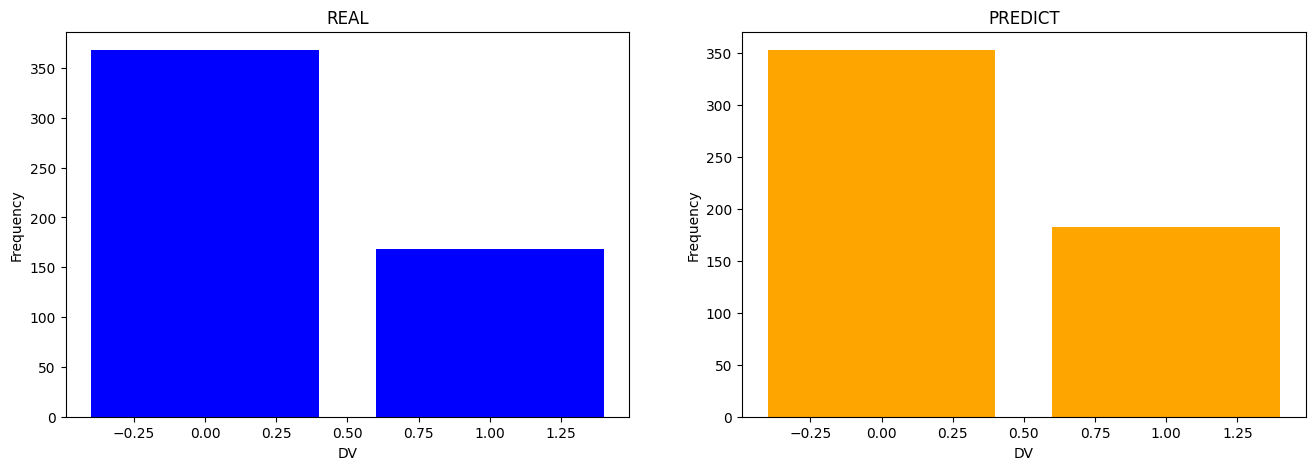

In [463]:
model.eval()
with torch.no_grad():
    pre_test = model(x_test_tensor)
    y_test_tensor1 = y_test_tensor.to(torch.long)
    y_test_tensor1 = y_test_tensor1.view(-1)
    
    ce_test = ce_loss(pre_test, y_test_tensor1)
    kl_test = kl_loss(model)
    cost_test = ce_test + kl_weight * kl_test

    _, predicted_test = torch.max(pre_test.data, 1)
    total_test = y_test_tensor1.size(0)
    report_test = classification_report(y_test_tensor1.cpu().numpy(), predicted_test.cpu().numpy())
    print("Test Set Classification Report:\n", report_test)
    draw_plot(predicted_test,y_test_tensor1)


#### BO

https://machinelearningmastery.com/what-is-bayesian-optimization/

In [473]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from sklearn.metrics import accuracy_score
from torch.utils.data import DataLoader, TensorDataset

# Define Bayesian Neural Network Model
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=27, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=2),
)

ce_loss = nn.CrossEntropyLoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)

# Convert data to PyTorch TensorDataset
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)

@use_named_args([Real(1e-6, 0.1, name='learning_rate'), Integer(50, 200, name='epochs')])
def evaluate_model(learning_rate, epochs):
    # Initialize the model, optimizer, and losses
    model = nn.Sequential(
        bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=27, out_features=100),
        nn.ReLU(),
        bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=2),
    )

    ce_loss = nn.CrossEntropyLoss()
    kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
    kl_weight = 0.01

    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop
    for epoch in range(epochs):
        pre = model(x_train_tensor)
        y_train_tensor1 = y_train_tensor.to(torch.long)
        y_train_tensor1 = y_train_tensor1.view(-1)
        ce = ce_loss(pre, y_train_tensor1)
        kl = kl_loss(model)
        cost = ce + kl_weight * kl

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

    # Calculate accuracy on the training set
    with torch.no_grad():
        model.eval()
        train_pre = model(x_train_tensor)
        _, train_predicted = torch.max(train_pre.data, 1)
        train_total = y_train_tensor.size(0)
        train_correct = (train_predicted == y_train_tensor).sum()
        train_accuracy = float(train_correct) / train_total

    return 1.0 - train_accuracy


# Perform Bayesian Optimization
result = gp_minimize(evaluate_model, dimensions=[(1e-6, 0.1), (50, 200)], n_calls=10)

# Summarize the findings
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: learning_rate=%.6f, epochs=%d' % (result.x[0], result.x[1]))


ValueError: prior should be 'uniform' or 'log-uniform' got 200

In [467]:
# example of bayesian optimization with scikit-optimize
from numpy import mean
from sklearn.datasets import make_blobs
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from skopt.space import Integer
from skopt.utils import use_named_args
from skopt import gp_minimize

np.int = np.int_
# generate 2d classification dataset
X, y = make_blobs(n_samples=500, centers=3, n_features=2)
# define the model
model = KNeighborsClassifier()
# define the space of hyperparameters to search
search_space = [Integer(1, 5, name='n_neighbors'), Integer(1, 2, name='p')]

# define the function used to evaluate a given configuration
@use_named_args(search_space)
def evaluate_model(**params):
	# something
	model.set_params(**params)
	# calculate 5-fold cross validation
	result = cross_val_score(model, X, y, cv=5, n_jobs=-1, scoring='accuracy')
	# calculate the mean of the scores
	estimate = mean(result)
	return 1.0 - estimate

# perform optimization
result = gp_minimize(evaluate_model, search_space)
# summarizing finding:
print('Best Accuracy: %.3f' % (1.0 - result.fun))
print('Best Parameters: n_neighbors=%d, p=%d' % (result.x[0], result.x[1]))

c:\Users\ishaq\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\ishaq\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\ishaq\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\ishaq\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\Users\ishaq\AppData\Local\Programs\Python\Python39\lib\site-packages\skopt\optimizer\optimize

Best Accuracy: 1.000
Best Parameters: n_neighbors=3, p=2


-----------------------

### Support Vector Machine

#### BO


### Random Forest and Decision Trees

#### BO